In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
from functions import *
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_reviews_dataframe')

In [3]:
df.head()

,reviews,sentiment,cleaned_reviews
0,Working with one of the best Shakespeare sourc...,0,work with one of the good shakespeare source t...
1,"Well...tremors I, the original started off in ...",0,well tremor i the original start off in and i ...
2,Ouch! This one was a bit painful to sit throug...,0,ouch this one be a bit painful to sit through ...
3,"I've seen some crappy movies in my life, but t...",0,-PRON- have see some crappy movie in -PRON- li...
4,"""Carriers"" follows the exploits of two guys an...",0,carrier follow the exploit of two guy and tw...


## Explore Uni-, Bi-, Tri- grams

In [4]:
#create neg. and pos. dataframes
df_negative = df[:12499]
df_positive = df[12500:]

In [5]:
stopwords_list = stopwords.words('english')+['pron', '-PRON-']

In [6]:
#function to find highest count n-gram
def n_gram(df_col, n=None):
    # Build the vectorizer, specify inputted n-gram, remove stop words
    vect = CountVectorizer(ngram_range = (n,n), stop_words = stopwords_list, min_df = 10)
    # fit/transform vectorizer on specified column
    vect_fit = vect.fit_transform(df_col)
    # get all words and store in a list
    word_list = vect.get_feature_names()
    # get a count of all the words
    count_list = vect_fit.toarray().sum(axis=0)
    #create a dictionary of word to count pairings
    count_dict = dict(zip(word_list, count_list))
    # sort the dictionary to show highest counted words on top
    sort_vocab = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)
    
    return sort_vocab

### Unigrams for all, neg, and pos reviews

In [7]:
# get top words for full df
full_vocab = n_gram(df['cleaned_reviews'], n=1)
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
unigram_full.head()

,Word,Count
0,movie,51691
1,film,47748
2,one,27745
3,see,23913
4,make,23263


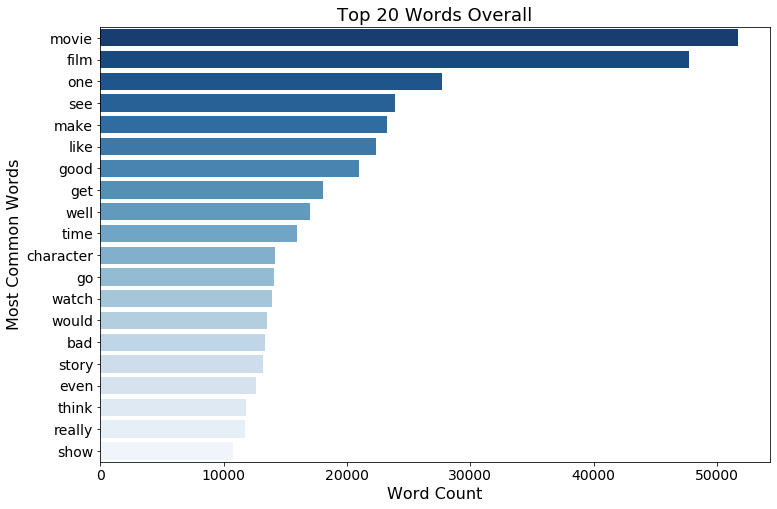

In [8]:
#bar plot for top 20 words
plt.figure(figsize=(12,8))
sns.barplot(unigram_full['Count'],unigram_full['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Words Overall',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [9]:
# get top words for neg df
neg_vocab = n_gram(df_negative['cleaned_reviews'], n=1)
unigram_neg = pd.DataFrame(neg_vocab[:20], columns = ['Word','Count'])
unigram_neg.head()

,Word,Count
0,movie,29034
1,film,22679
2,one,13575
3,make,12615
4,like,12101


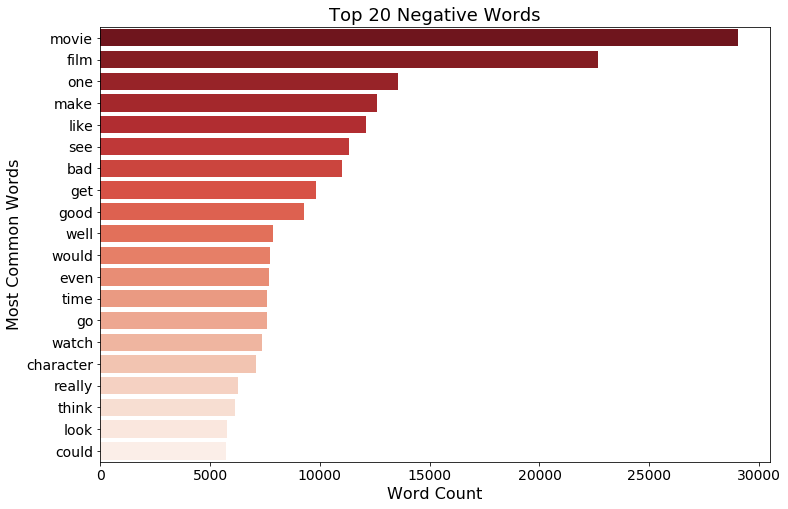

In [10]:
#bar plot for top 20 negative words
plt.figure(figsize=(12,8))
sns.barplot(unigram_neg['Count'],unigram_neg['Word'],palette='Reds_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Negative Words',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [11]:
# get top words for pos df
pos_vocab = n_gram(df_positive['cleaned_reviews'], n=1)
unigram_pos = pd.DataFrame(pos_vocab[:20], columns = ['Word','Count'])
unigram_pos.head()

,Word,Count
0,film,25069
1,movie,22655
2,one,14170
3,see,12583
4,good,11722


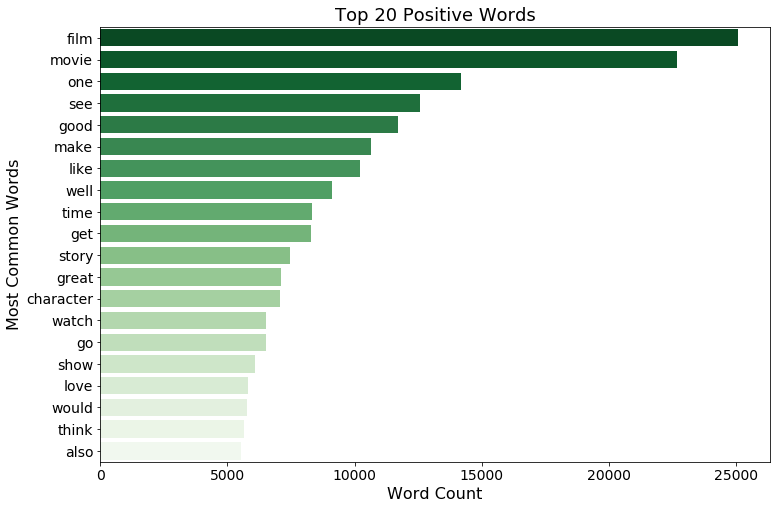

In [12]:
#bar plot for top 20 positive words
plt.figure(figsize=(12,8))
sns.barplot(unigram_pos['Count'],unigram_pos['Word'],palette='Greens_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Positive Words',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

### Bigrams for all, neg, and pos reviews

In [13]:
# get top bigrams for full df
full_vocab = n_gram(df['cleaned_reviews'], n=2)
bigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
bigram_full.head()

,Word,Count
0,see movie,1874
1,look like,1806
2,watch movie,1553
3,ever see,1523
4,bad movie,1386


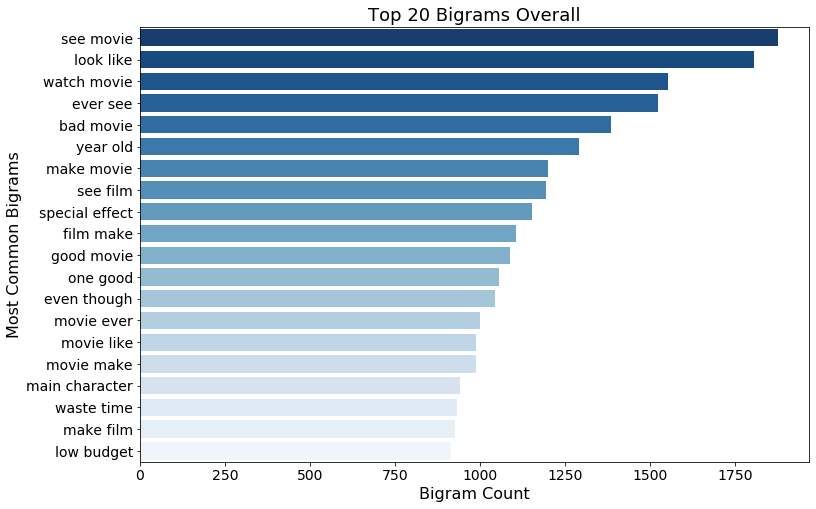

In [14]:
#bar plot for top 20 bigrams
plt.figure(figsize=(12,8))
sns.barplot(bigram_full['Count'],bigram_full['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Bigrams Overall',fontsize=18)
plt.ylabel('Most Common Bigrams',fontsize=16)
plt.xlabel('Bigram Count',fontsize=16)
sns.set_style()
plt.show()

In [15]:
# get top bigrams for neg df
neg_vocab = n_gram(df_negative['cleaned_reviews'], n=2)
bigram_neg = pd.DataFrame(neg_vocab[:20], columns = ['Word','Count'])
bigram_neg.head()

,Word,Count
0,look like,1325
1,bad movie,1277
2,ever see,940
3,watch movie,888
4,waste time,879


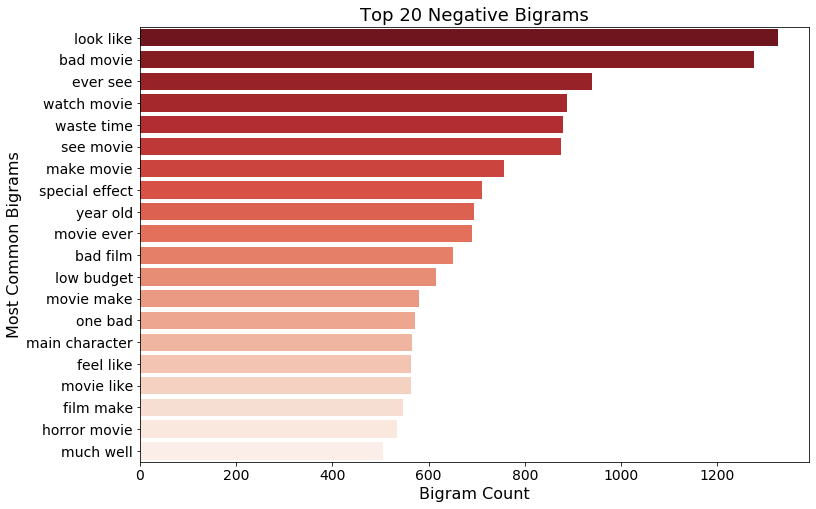

In [16]:
#bar plot for top 20 negative bigrams
plt.figure(figsize=(12,8))
sns.barplot(bigram_neg['Count'],bigram_neg['Word'],palette='Reds_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Negative Bigrams',fontsize=18)
plt.ylabel('Most Common Bigrams',fontsize=16)
plt.xlabel('Bigram Count',fontsize=16)
sns.set_style()
plt.show()

In [17]:
# get top bigrams for pos df
pos_vocab = n_gram(df_positive['cleaned_reviews'], n=2)
bigram_pos = pd.DataFrame(pos_vocab[:20], columns = ['Word','Count'])
bigram_pos.head()

,Word,Count
0,see movie,999
1,one good,826
2,see film,713
3,watch movie,665
4,good movie,638


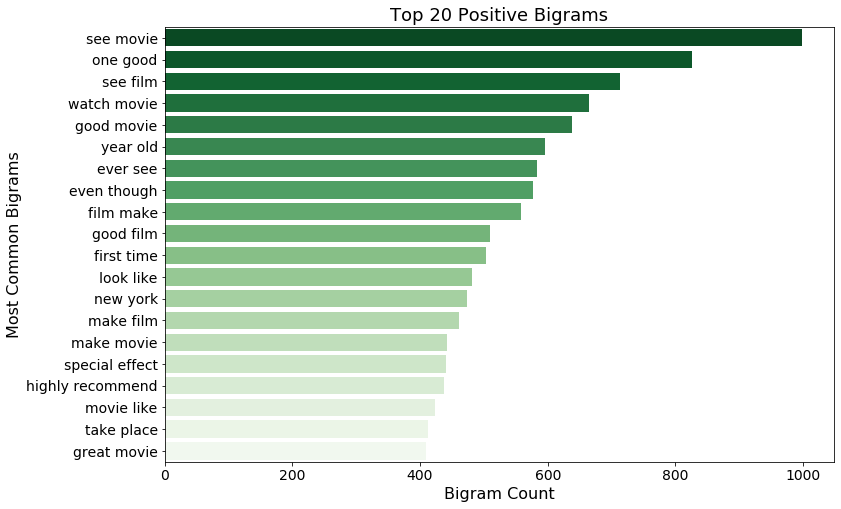

In [18]:
#bar plot for top 20 positive bigrams
plt.figure(figsize=(12,8))
sns.barplot(bigram_pos['Count'],bigram_pos['Word'],palette='Greens_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Positive Bigrams',fontsize=18)
plt.ylabel('Most Common Bigrams',fontsize=16)
plt.xlabel('Bigram Count',fontsize=16)
sns.set_style()
plt.show()

### Trigrams for all, neg, and pos reviews

In [19]:
# get top trigrams for full df
full_vocab = n_gram(df['cleaned_reviews'], n=3)
trigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
trigram_full.head()

,Word,Count
0,movie ever see,469
1,bad movie ever,406
2,film ever see,236
3,movie ever make,209
4,one bad movie,183


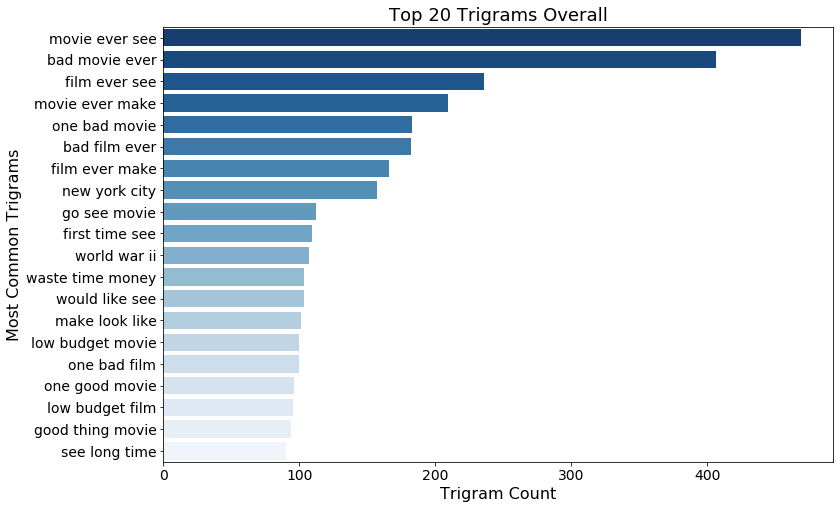

In [20]:
#bar plot for top 20 bigrams
plt.figure(figsize=(12,8))
sns.barplot(trigram_full['Count'],trigram_full['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Trigrams Overall',fontsize=18)
plt.ylabel('Most Common Trigrams',fontsize=16)
plt.xlabel('Trigram Count',fontsize=16)
sns.set_style()
plt.show()

In [21]:
# get top trigrams for neg df
neg_vocab = n_gram(df_negative['cleaned_reviews'], n=3)
trigram_neg = pd.DataFrame(neg_vocab[:20], columns = ['Word','Count'])
trigram_neg.head()

,Word,Count
0,bad movie ever,392
1,movie ever see,344
2,bad film ever,178
3,one bad movie,178
4,film ever see,169


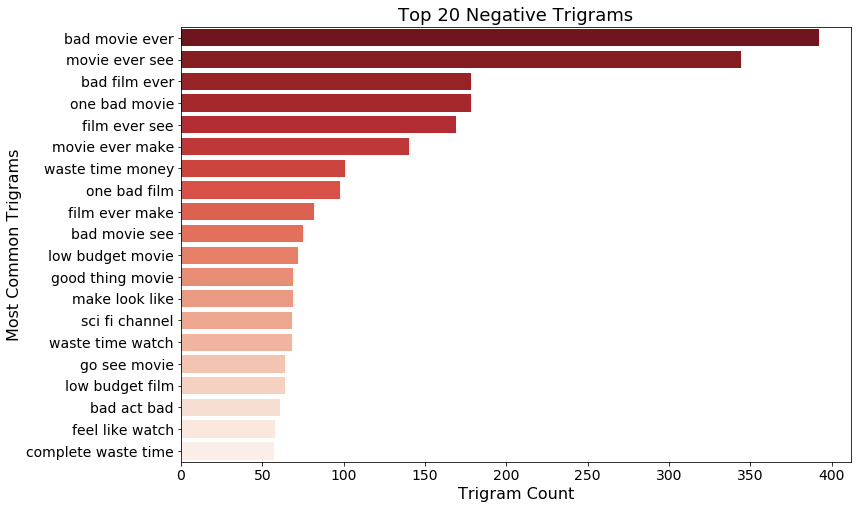

In [22]:
#bar plot for top 20 negative trigrams
plt.figure(figsize=(12,8))
sns.barplot(trigram_neg['Count'],trigram_neg['Word'],palette='Reds_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Negative Trigrams',fontsize=18)
plt.ylabel('Most Common Trigrams',fontsize=16)
plt.xlabel('Trigram Count',fontsize=16)
sns.set_style()
plt.show()

In [23]:
# get top trigrams for pos df
pos_vocab = n_gram(df_positive['cleaned_reviews'], n=3)
trigram_pos = pd.DataFrame(pos_vocab[:20], columns = ['Word','Count'])
trigram_pos.head()

,Word,Count
0,movie ever see,125
1,new york city,111
2,one good movie,90
3,first time see,86
4,film ever make,84


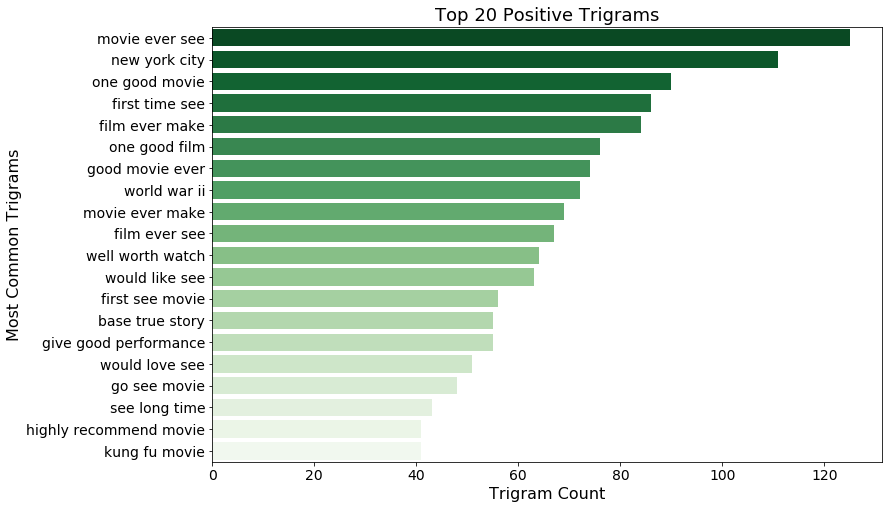

In [24]:
#bar plot for top 20 positive trigrams
plt.figure(figsize=(12,8))
sns.barplot(trigram_pos['Count'],trigram_pos['Word'],palette='Greens_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Positive Trigrams',fontsize=18)
plt.ylabel('Most Common Trigrams',fontsize=16)
plt.xlabel('Trigram Count',fontsize=16)
sns.set_style()
plt.show()

---

## Explore length of reviews

In [25]:
# Create column of each review's length
df['length'] = [len(x) for x in df['reviews']]

In [26]:
df.head()

,reviews,sentiment,cleaned_reviews,length
0,Working with one of the best Shakespeare sourc...,0,work with one of the good shakespeare source t...,240
1,"Well...tremors I, the original started off in ...",0,well tremor i the original start off in and i ...,1025
2,Ouch! This one was a bit painful to sit throug...,0,ouch this one be a bit painful to sit through ...,681
3,"I've seen some crappy movies in my life, but t...",0,-PRON- have see some crappy movie in -PRON- li...,1924
4,"""Carriers"" follows the exploits of two guys an...",0,carrier follow the exploit of two guy and tw...,4647


In [27]:
# Maximum Review Length
df.length.max()

13604

In [28]:
# Average Review Length
print('Average Review length for all reviews: ',df.length.values.mean())
print('Average Review length for negative reviews: ',df[:12499].length.values.mean())
print('Average Review length for positive reviews: ',df[12500:].length.values.mean())

Average Review length for all reviews:  1304.69564
Average Review length for negative reviews:  1281.996559724778
Average Review length for positive reviews:  1327.46664


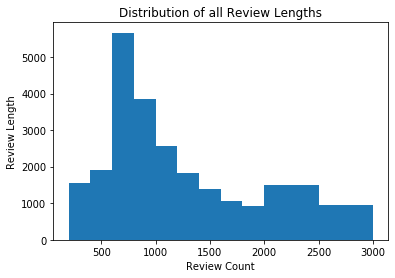

In [29]:
plt.hist(df.length.values, bins=[200,400,600,800,1000,1200,1400,1600,1800,2000,2500,3000])
plt.title('Distribution of all Review Lengths')
plt.xlabel('Review Count')
plt.ylabel('Review Length')
plt.show()

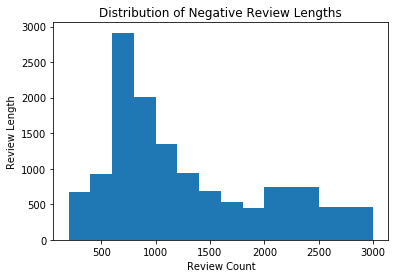

In [30]:
plt.hist(df[:12499].length.values, bins=[200,400,600,800,1000,1200,1400,1600,1800,2000,2500,3000])
plt.title('Distribution of Negative Review Lengths')
plt.xlabel('Review Count')
plt.ylabel('Review Length')
plt.show()

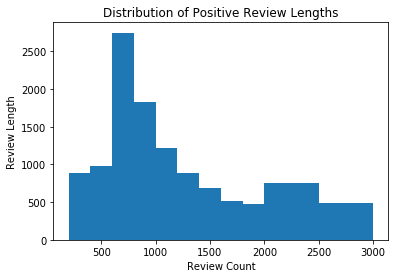

In [31]:
plt.hist(df[12500:].length.values, bins=[200,400,600,800,1000,1200,1400,1600,1800,2000,2500,3000])
plt.title('Distribution of Positive Review Lengths')
plt.xlabel('Review Count')
plt.ylabel('Review Length')
plt.show()

#### From these histograms we see that the length of the review should have no bearing on whether the review is positive or negative. The average lengths for each review type are all right around 1300 characters and the graphs display how similar positive and negative review lengths are, they almost look like an exact copy.

## Distribution of Positive and Negative Reviews

In [32]:
# our classes for our dataset are completely balanced so we will not 
# have to deal with any resampling methods
df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

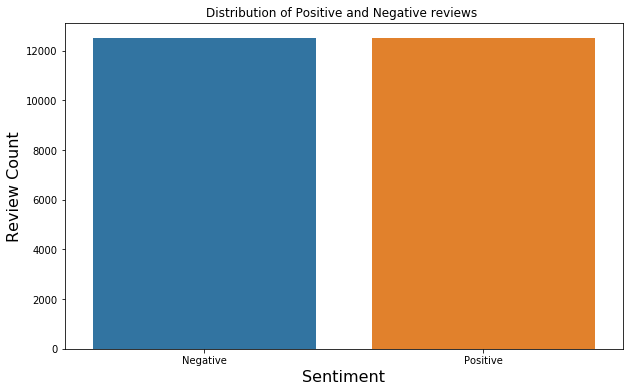

In [33]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="sentiment", data=df)
plt.title("Distribution of Positive and Negative reviews ")
plt.ylabel('Review Count',fontsize=16)
plt.xlabel('Sentiment',fontsize=16)
plt.xticks(np.arange(2), ('Negative', 'Positive'))
plt.show()